In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Confidence Intervals

In [2]:
def bootstrap_mean(sample_from_population, label, repetitions):
    resampled_means = []
    for i in np.arange(repetitions):
        resample = sample_from_population.sample()
        mean = np.mean(resample.column(label))
        resampled_means.append(mean)
    return resampled_means

In [3]:
def bootstrap_ci_mean(sample_from_population, label, repetitions):
    resampled_means = bootstrap_mean(sample_from_population, label, repetitions)
    
    interval_95 = make_array(
    percentile(2.5, resampled_means),
    percentile(97.5, resampled_means)
    )
    
    Table().with_column('Resampled mean', resampled_means).hist(0)
    plt.plot(interval_95, [0, 0], color='gold', lw=8)
    print('Approximate 95% Bootstrap Confidence Interval for Population Mean:')
    print(np.round(interval_95, 3))

In [5]:
flips = Table.read_table('http://inferentialthinking.com/notebooks/unfair_flips.csv')
flips.show(3)

Heads
1
0
0


In [7]:
flips.group('Heads')

Heads,count
0,42
1,133


In [11]:
np.mean(make_array(0, 0, 1))

0.33333333333333331

In [12]:
np.mean(flips.column('Heads'))

0.76000000000000001

In [14]:
flips.num_rows

175

Approximate 95% Bootstrap Confidence Interval for Population Mean:
[ 0.697  0.823]


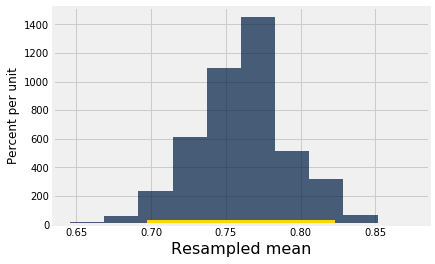

In [13]:
bootstrap_ci_mean(flips, 'Heads', 5000)

## Means

In [15]:
values = [3, 2, 9, 3]

In [16]:
np.average(values)

4.25

In [17]:
np.mean(values)

4.25

In [18]:
sum(values) / len(values)

4.25

In [19]:
(1/4) * 2 + (2/4) * 3 + (1/4) * 9

4.25

## Standard Deviation

In [22]:
values = make_array(3, 2, 9, 3)
values

array([3, 2, 9, 3])

In [23]:
average = np.average(values)
average

4.25

In [25]:
deviations = values - average
deviations

array([-1.25, -2.25,  4.75, -1.25])

In [26]:
t = Table().with_columns(
    'Value', values,
    'Deviation from Average', deviations,
)
t

Value,Deviation from Average
3,-1.25
2,-2.25
9,4.75
3,-1.25


In [29]:
t.column(1).sum()

0.0

In [32]:
t.with_column('Squared Deviations', deviations ** 2)

Value,Deviation from Average,Squared Deviations
3,-1.25,1.5625
2,-2.25,5.0625
9,4.75,22.5625
3,-1.25,1.5625


In [33]:
squared_devs = deviations ** 2
squared_devs

array([  1.5625,   5.0625,  22.5625,   1.5625])

In [35]:
variance = np.mean(squared_devs)
variance

7.6875

In [37]:
sd = np.sqrt(variance)
sd

2.7726341266023544

In [38]:
np.std(values)

2.7726341266023544